# Dataset 5: EEG Seizure Recognition Data Set


## 1. Import Data

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from numpy import mean

#import data
eegData = pd.read_csv('eeg.csv')
eegData.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


## 2. Data Preparation

In [3]:
# to change y variable to a binary variable
eegData['output'] = eegData.y==1
eegData['output'] = eegData['output'].astype(int)
eegData.pop('y')
eegData.pop('Unnamed: 0')
eegData.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,output
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [4]:
# splitting the data into train, validation and test data sets
# importing 
from sklearn.model_selection import train_test_split

y = pd.DataFrame(eegData['output'])
X = pd.DataFrame(eegData.iloc[:,:-1])

# Split the Dataset into Train and Test
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.80, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 1)


## 3. Training different classification models

### a) Decision Tree

In [5]:
# using k-fold cross validation of dataset to avoid overfiting
# import Decision Tree model & cross validation functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# set the number of folds to 10
cv = KFold(n_splits=10, random_state=1, shuffle=True)
dectree = DecisionTreeClassifier(max_depth = 3)

# calculate accuracy, recall and auc of ROC curve 
accuracy_DT = cross_val_score(dectree, X, y.values.ravel(), scoring='accuracy', cv=cv)
recall_DT = cross_val_score(dectree, X, y.values.ravel(), scoring='recall', cv=cv)
auc_DT = cross_val_score(dectree, X, y.values.ravel(), scoring='roc_auc', cv=cv)

print('For Decision Tree')
print('Accuracy: %.3f' % (mean(accuracy_DT)))
print('Recall: %.3f' % (mean(recall_DT)))
print('AUC under ROC: %.3f' % (mean(auc_DT)))

For Decision Tree
Accuracy: 0.901
Recall: 0.626
AUC under ROC: 0.807


[Text(669.6, 570.7800000000001, 'X44 <= 136.5\ngini = 0.322\nsamples = 9200\nvalue = [7346, 1854]\nclass = Seizure'),
 Text(334.8, 407.70000000000005, 'X44 <= -166.5\ngini = 0.252\nsamples = 8491\nvalue = [7238, 1253]\nclass = Seizure'),
 Text(167.4, 244.62, 'X59 <= -1.5\ngini = 0.261\nsamples = 550\nvalue = [85, 465]\nclass = Normal'),
 Text(83.7, 81.53999999999996, 'gini = 0.427\nsamples = 249\nvalue = [77, 172]\nclass = Normal'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.052\nsamples = 301\nvalue = [8, 293]\nclass = Normal'),
 Text(502.20000000000005, 244.62, 'X156 <= 166.5\ngini = 0.179\nsamples = 7941\nvalue = [7153, 788]\nclass = Seizure'),
 Text(418.5, 81.53999999999996, 'gini = 0.145\nsamples = 7724\nvalue = [7115, 609]\nclass = Seizure'),
 Text(585.9, 81.53999999999996, 'gini = 0.289\nsamples = 217\nvalue = [38, 179]\nclass = Normal'),
 Text(1004.4000000000001, 407.70000000000005, 'X44 <= 212.5\ngini = 0.258\nsamples = 709\nvalue = [108, 601]\nclass = Normal'),
 T

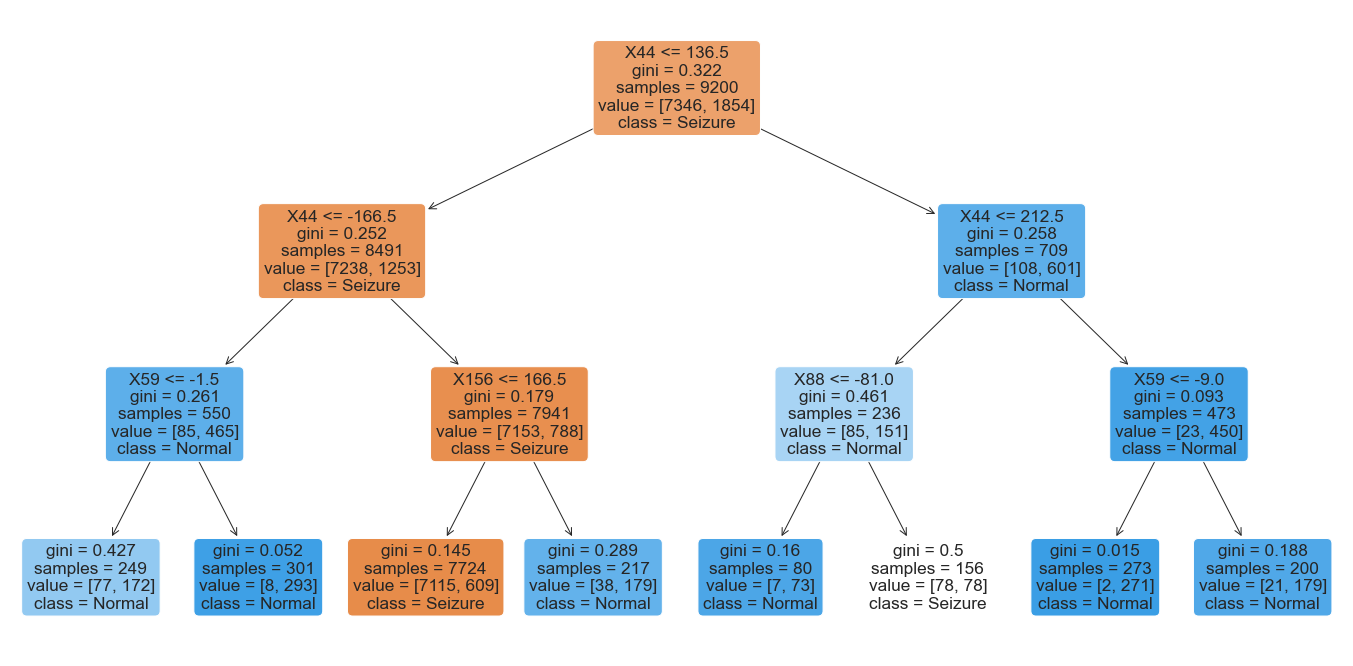

In [6]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Seizure","Normal"])

### b) K Nearest  Neighbors (KNN)

In [7]:
# import KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn_i = KNeighborsClassifier()

# calculate accuracy, recall and auc of ROC curve 
accuracy_KNN_i = cross_val_score(knn_i, X, y.values.ravel(), scoring='accuracy', cv=cv)
recall_KNN_i = cross_val_score(knn_i, X, y.values.ravel(), scoring='recall', cv=cv)
auc_KNN_i = cross_val_score(knn_i, X, y.values.ravel(), scoring='roc_auc', cv=cv)

# print results
print('For KNN')
print('Accuracy: %.3f' % (mean(accuracy_KNN_i)))
print('Recall: %.3f' % (mean(recall_KNN_i)))
print('AUC under ROC: %.3f' % (mean(auc_KNN_i)))

For KNN
Accuracy: 0.925
Recall: 0.631
AUC under ROC: 0.917


### c) Naive Bayes

In [8]:
# import Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB
cv = KFold(n_splits=10, random_state=1, shuffle=True)
NB = GaussianNB()

# calculate accuracy, recall and auc of ROC curve 
accuracy_NB = cross_val_score(NB, X, y.values.ravel(), scoring='accuracy', cv=cv)
recall_NB = cross_val_score(NB, X, y.values.ravel(), scoring='recall', cv=cv)
auc_NB = cross_val_score(NB, X, y.values.ravel(), scoring='roc_auc', cv=cv)

# print results
print('For Naive Bayes')
print('Accuracy: %.3f' % (mean(accuracy_NB)))
print('Recall: %.3f' % (mean(recall_NB)))
print('AUC under ROC: %.3f' % (mean(auc_NB)))

For Naive Bayes
Accuracy: 0.957
Recall: 0.891
AUC under ROC: 0.984


### d) Random Forest

In [9]:
# import Random Forest model from sklearn

from sklearn.ensemble import RandomForestClassifier
cv = KFold(n_splits=10, random_state=1, shuffle=True)
rf = RandomForestClassifier(max_depth = 6)

# calculate accuracy, recall and auc of ROC curve 
accuracy_RF_i = cross_val_score(rf, X, y.values.ravel(), scoring='accuracy', cv=cv)
recall_RF_i = cross_val_score(rf, X, y.values.ravel(), scoring='recall', cv=cv)
auc_RF_i = cross_val_score(rf, X, y.values.ravel(), scoring='roc_auc', cv=cv)

# print results
print('For Random Forest')
print('Accuracy: %.3f' % (mean(accuracy_RF_i)))
print('Recall: %.3f' % (mean(recall_RF_i)))
print('AUC under ROC: %.3f' % (mean(auc_RF_i)))

For Random Forest
Accuracy: 0.952
Recall: 0.786
AUC under ROC: 0.992


## 5. Results from each model

For Decision Tree
Accuracy: 0.901
Recall: 0.626
AUC under ROC: 0.807

For KNN
Accuracy: 0.925
Recall: 0.631
AUC under ROC: 0.917

For Naive Bayes
Accuracy: 0.957
Recall: 0.891
AUC under ROC: 0.984

For Random Forest
Accuracy: 0.952
Recall: 0.786
AUC under ROC: 0.992


<AxesSubplot:xlabel='Model'>

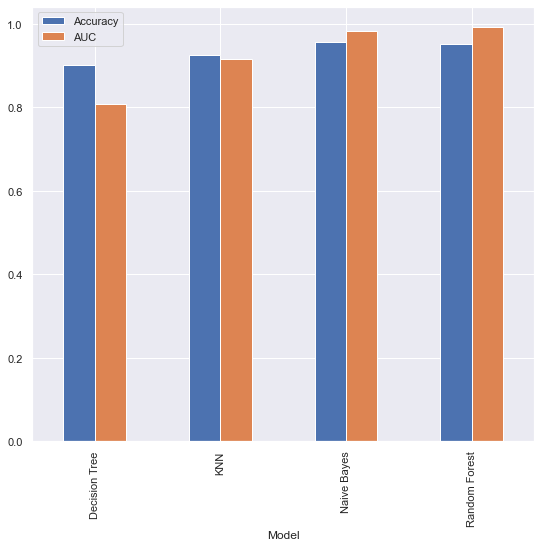

In [10]:
print('For Decision Tree')
print('Accuracy: %.3f' % (mean(accuracy_DT)))
print('Recall: %.3f' % (mean(recall_DT)))
print('AUC under ROC: %.3f' % (mean(auc_DT)))
print()
print('For KNN')
print('Accuracy: %.3f' % (mean(accuracy_KNN_i)))
print('Recall: %.3f' % (mean(recall_KNN_i)))
print('AUC under ROC: %.3f' % (mean(auc_KNN_i)))
print()
print('For Naive Bayes')
print('Accuracy: %.3f' % (mean(accuracy_NB)))
print('Recall: %.3f' % (mean(recall_NB)))
print('AUC under ROC: %.3f' % (mean(auc_NB)))
print()
print('For Random Forest')
print('Accuracy: %.3f' % (mean(accuracy_RF_i)))
print('Recall: %.3f' % (mean(recall_RF_i)))
print('AUC under ROC: %.3f' % (mean(auc_RF_i)))


results_table = {'Model':['Decision Tree','KNN','Naive Bayes','Random Forest'],
          'Accuracy':[mean(accuracy_DT), mean(accuracy_KNN_i), mean(accuracy_NB),mean(accuracy_RF_i)],
        'AUC':[mean(auc_DT),mean(auc_KNN_i),mean(auc_NB),mean(auc_RF_i)]
               }
#'Recall':[mean(recall_DT),mean(recall_KNN),mean(recall_NB),mean(recall_RF)]
results_df = pd.DataFrame(results_table)
results_df.plot(x="Model", y=["Accuracy", "AUC"], kind="bar",figsize=(9,8))

Based on accuracy, recall and AUC under the ROC curve, the random forest model produces the best results. Therefore, we will try to tune the hyperparameters to try and optimise our model.

## 6. Hyperparameter tuning

In [11]:
# Look at hyperparameters used by our current forest
RF = RandomForestClassifier(random_state = 42)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


From here, we select n_estimators, max_features and max_depth as our hyperparameters that we want to tune. If we had the time and resources, we might want to consider other hyperparameters to tune as well.

In [12]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


First, we use the random search method to search a larger range of values in search for the best hyperparameters.

In [13]:
# note: to reduce the time taken to train, we reduced the number of folds to 3
# however, running this portion of the code still took around 45 minutes for our laptops

# create the base model to tune
RF = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

# print the best parameters 
print('From random search method: \n')
rf_random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
From random search method: 



{'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 60}

From the earlier results, we then use the grid search method to pinpoint the best hyperparameters.

In [16]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [56,58,60,62,64],
    'max_features': ['sqrt'],
    'n_estimators': [600,800,900]
}
# Create a based model
RF = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())

# print out the hyperparameters
print('After grid search method: \n')
grid_search.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits
After grid search method: 



{'max_depth': 58, 'max_features': 'sqrt', 'n_estimators': 600}

Now, we can compare the results between the random forest model before and after hyperparameter tuning.

In [18]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
rf = RandomForestClassifier(max_depth = 58, n_estimators=600,max_features = 'sqrt')

accuracy_RF_f = cross_val_score(rf, X, y.values.ravel(), scoring='accuracy', cv=cv)
recall_RF_f = cross_val_score(rf, X, y.values.ravel(), scoring='recall', cv=cv)
auc_RF_f = cross_val_score(rf, X, y.values.ravel(), scoring='roc_auc', cv=cv)

print('For Random Forest before hyperparameter tuning')
print('Accuracy: %.3f' % (mean(accuracy_RF_i)))
print('Recall: %.3f' % (mean(recall_RF_i)))
print('AUC under ROC: %.3f' % (mean(auc_RF_i)))

print('For Random Forest after tuning')
print('Accuracy: %.3f' % (mean(accuracy_RF_f)))
print('Recall: %.3f' % (mean(recall_RF_f)))
print('AUC under ROC: %.3f' % (mean(auc_RF_f)))

For Random Forest before hyperparameter tuning
Accuracy: 0.952
Recall: 0.786
AUC under ROC: 0.992
For Random Forest after tuning
Accuracy: 0.975
Recall: 0.931
AUC under ROC: 0.996


## 7. Feature Extraction using Variance Threshold Method

We would now like to explore the possibility of achieving the same results with less readings. If possible, the lesser readings that we have, the less bulky the eeg machine will be. We would be making the process of taking an eeg a lot simpler, cheaper and convenient if less electrodes were needed.

In [19]:
# import variancethreshold method from sklearn
from sklearn.feature_selection import VarianceThreshold

# set threshold to 25000, 26000
vt_1 = VarianceThreshold(threshold=25000)
vt_2 = VarianceThreshold(threshold=26000)

# Fit
vt_1.fit(X)
vt_2.fit(X)

# Get the boolean mask
mask_1 = vt_1.get_support()
mask_2 = vt_2.get_support()

# drop the values which are lower than the thresholds set
X_1 = X.loc[:, mask_1]
print(X_1.shape)
X_2 = X.loc[:, mask_2]
print(X_2.shape)

(11500, 172)
(11500, 148)


In [20]:
# sorry, this part may take a while to due to the large depth and number of trees
# using Random Forest, retrain model with different X
X_train_1, X_rem_1, y_train_1, y_rem_1 = train_test_split(X_1, y, train_size = 0.80, random_state = 2)
X_valid_1, X_test_1, y_valid_1, y_test_1 = train_test_split(X_rem_1,y_rem_1, test_size=0.5, random_state = 3)

X_train_2, X_rem_2, y_train_2, y_rem_2 = train_test_split(X_2, y, train_size = 0.80, random_state = 4)
X_valid_2, X_test_2, y_valid_2, y_test_2 = train_test_split(X_rem_2,y_rem_2, test_size=0.5, random_state = 5)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
rf_1 = RandomForestClassifier(max_depth = 92, n_estimators=500,max_features = 'sqrt')
rf_2 = RandomForestClassifier(max_depth = 92, n_estimators=500,max_features = 'sqrt')

accuracy_RF_1 = cross_val_score(rf_1, X_1, y.values.ravel(), scoring='accuracy', cv=cv)
recall_RF_1 = cross_val_score(rf_1, X_1, y.values.ravel(), scoring='recall', cv=cv)
auc_RF_1 = cross_val_score(rf_1, X_1, y.values.ravel(), scoring='roc_auc', cv=cv)

accuracy_RF_2 = cross_val_score(rf_2, X_2, y.values.ravel(), scoring='accuracy', cv=cv)
recall_RF_2 = cross_val_score(rf_2, X_2, y.values.ravel(), scoring='recall', cv=cv)
auc_RF_2 = cross_val_score(rf_2, X_2, y.values.ravel(), scoring='roc_auc', cv=cv)

print('Using 172 features')
print('Accuracy: %.3f' % (mean(accuracy_RF_1)))
print('Recall: %.3f' % (mean(recall_RF_1)))
print('AUC under ROC: %.3f' % (mean(auc_RF_1)),'\n')

print('Using 148 features')
print('Accuracy: %.3f' % (mean(accuracy_RF_2)))
print('Recall: %.3f' % (mean(recall_RF_2)))
print('AUC under ROC: %.3f' % (mean(auc_RF_2)),'\n')

Using 172 features
Accuracy: 0.975
Recall: 0.933
AUC under ROC: 0.996 

Using 148 features
Accuracy: 0.975
Recall: 0.932
AUC under ROC: 0.995 



In [21]:
# tabulate and print the results

X_table = {'Variance':['All included','>25000','>26000',],
           'No of features':[178,172,148],
          'Accuracy':[mean(accuracy_RF_f), mean(accuracy_RF_1), mean(accuracy_RF_2)],
           'Recall':[mean(recall_RF_f), mean(recall_RF_1), mean(recall_RF_2)],
          'AUC':[mean(auc_RF_f), mean(auc_RF_1), mean(auc_RF_2)]}
X_df = pd.DataFrame(X_table)
print(X_df)

       Variance  No of features  Accuracy    Recall       AUC
0  All included             178  0.975391  0.931343  0.995681
1        >25000             172  0.974957  0.932735  0.995687
2        >26000             148  0.975304  0.931956  0.995446
